# Imports

In [7]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Anomaly Detection
from sklearn.ensemble import IsolationForest


# 1. Dataset Analysis

In [5]:
df = pd.read_csv('../data/CC GENERAL.csv')
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()


Dataset shape: (8950, 18)
Columns: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
print("Dataset Information:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 1.1 Data Imputation

In [8]:
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## 1.2 Prepare for Feature Analysis

In [10]:
feature_cols = df.select_dtypes(include="number").columns.tolist() 
if 'CUST_ID' in feature_cols:
    feature_cols.remove('CUST_ID')

X = df[feature_cols].copy()
print(feature_cols)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. K-Means

## 2.1 Elbow Method

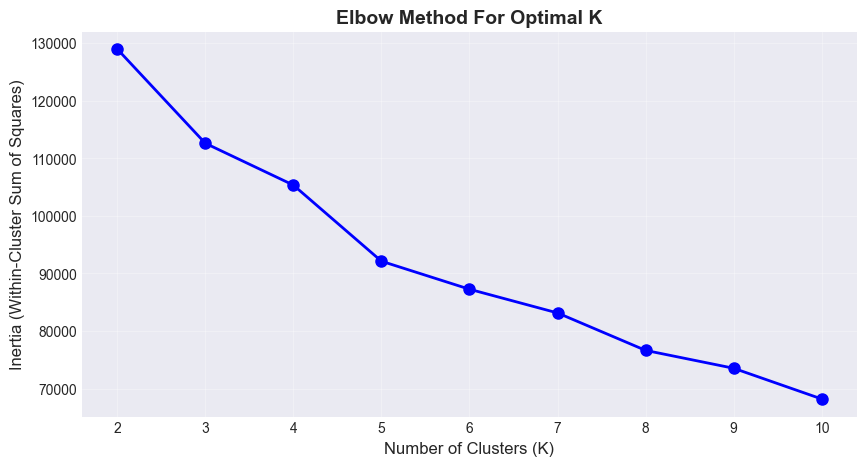

In [12]:
inertia_values = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.show()

## 2.2 Silhouette Scores

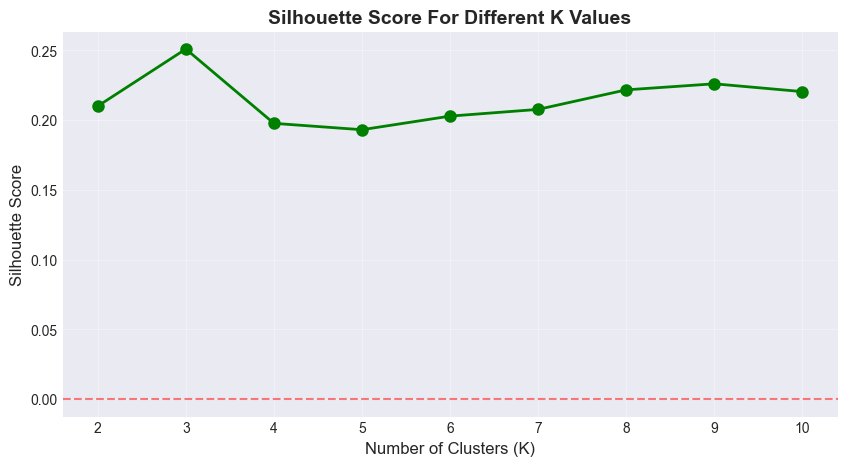


Silhouette Scores:
K=2: 0.210
K=3: 0.251
K=4: 0.198
K=5: 0.193
K=6: 0.203
K=7: 0.208
K=8: 0.222
K=9: 0.226
K=10: 0.220


In [13]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score For Different K Values', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.show()

print("\nSilhouette Scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"K={k}: {score:.3f}")

### Optimal K Discussion

We selected K = 3 based on the combined evidence from the elbow plot and silhouette scores. While the elbow curve shows a possible bend around K ≈ 5, the silhouette analysis supports K = 3 as the better choice, since it achieves the highest silhouette score and the scores generally decline after K = 3.

For business interpretability, I’d choose K = 3 as well, because it produces a small number of clear, easy-to-explain customer segments that stakeholders can actually act on. K = 5 can work if you need more granular personas, but it’s harder to communicate and may not add actionable value.

## 2.3 Fitting final K-Means Model

In [14]:
optimal_k = 3

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_scaled)

cluster_labels = kmeans_final.labels_

df['Cluster'] = cluster_labels
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())


Cluster distribution:
Cluster
0    1244
1    4557
2    3149
Name: count, dtype: int64


## 2.4 Analyzing Cluster Characteristics

In [20]:
cluster_means = df.groupby('Cluster')[feature_cols].mean()
print("Mean Values by Cluster:")
print(cluster_means)

print("\nCluster Sizes:")
print(df['Cluster'].value_counts().sort_index())

Mean Values by Cluster:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        4540.779565           0.968558   577.328730        362.963055   
1         942.285779           0.789345   302.351964        207.644643   
2        1289.083402           0.968448  2185.667964       1239.933881   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    214.447404   4506.324609             0.285389   
1                     95.005866    529.766557             0.244828   
2                    946.122934    235.275466             0.926621   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.136476                          0.186641   
1                          0.091372

## 2.5 Visualize Custers (Heatmap)

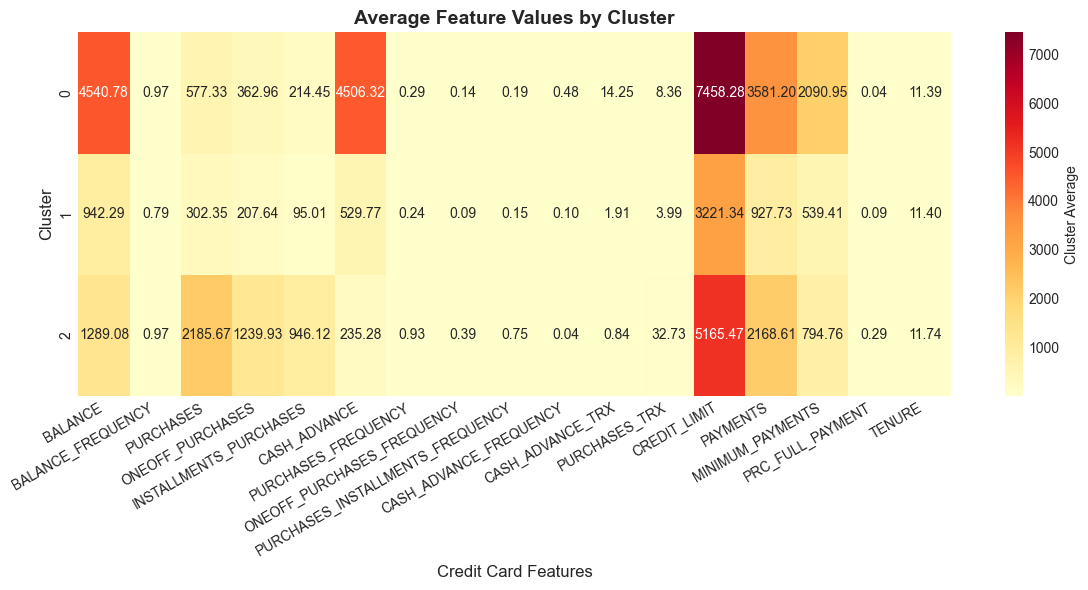

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlOrRd",
                 cbar_kws={"label": "Cluster Average"})
ax.set_title("Average Feature Values by Cluster", fontsize=14, fontweight="bold")
ax.set_ylabel("Cluster", fontsize=12)
ax.set_xlabel("Credit Card Features", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

### Clustering Charactersization Discussion

- Cluster 0 (cash withdrawl users): This group carries the highest average balance (≈4,541) and takes very large cash advances (≈4,506) with frequent cash-advance activity (cash-advance frequency ≈0.483 and ≈14.25 cash-advance transactions). They also have the highest credit limits (≈7,458) and minimum payments (≈2,091), but they rarely pay in full (PRC_FULL_PAYMENT ≈0.037), suggesting heavy cash-advance behavior.
- Cluster 1 (basic users): This is the largest segment and shows the lowest overall card usage, with low balances (≈942), low purchases (≈302), and few purchase transactions (≈3.99). They have the lowest credit limits (≈3,221) and relatively small payments (≈928), consistent with light, occasional usage and lower customer value.
- Cluster 2 (high-spend, active purchasers): This group is the most purchase-driven, with the highest total purchases (≈2,186) supported by both one-off (≈1,240) and installment purchases (≈946), and very high activity (purchase frequency ≈0.927 and ≈32.73 purchase transactions). Their cash-advance usage is minimal (cash-advance ≈235; cash-advance frequency ≈0.043), and they have the highest tendency to pay in full (PRC_FULL_PAYMENT ≈0.288), indicating engaged, higher-value shoppers.

# 3. Dimensionality Reduction

## 3.1 PCA

In [21]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled) 

print(f"PCA result shape: {X_pca.shape}")
print(f"\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.3f}")

PCA result shape: (8950, 2)

Explained variance ratio:
PC1: 0.273
PC2: 0.203
Total variance explained: 0.476


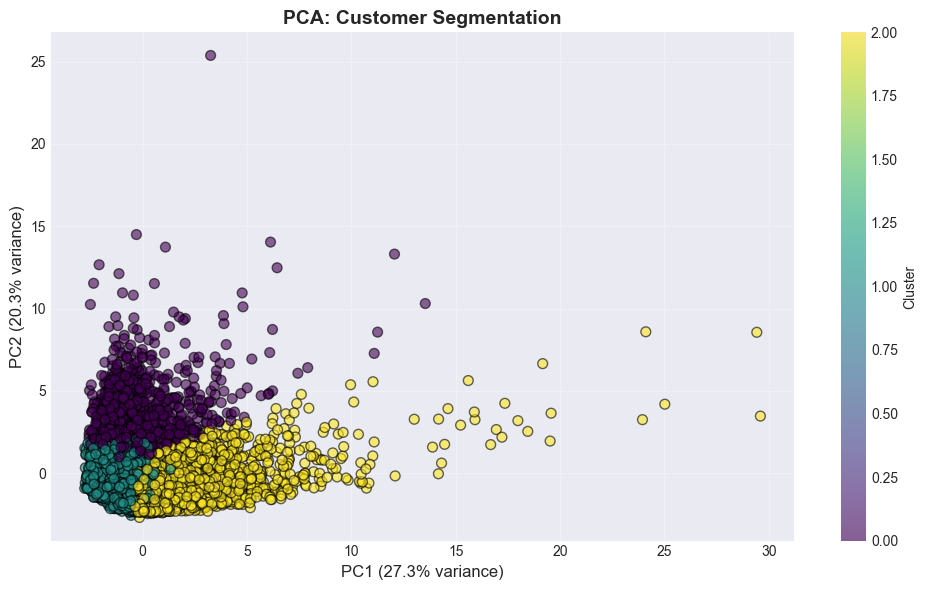

In [22]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
                     cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('PCA: Customer Segmentation', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3.2 t-SNE

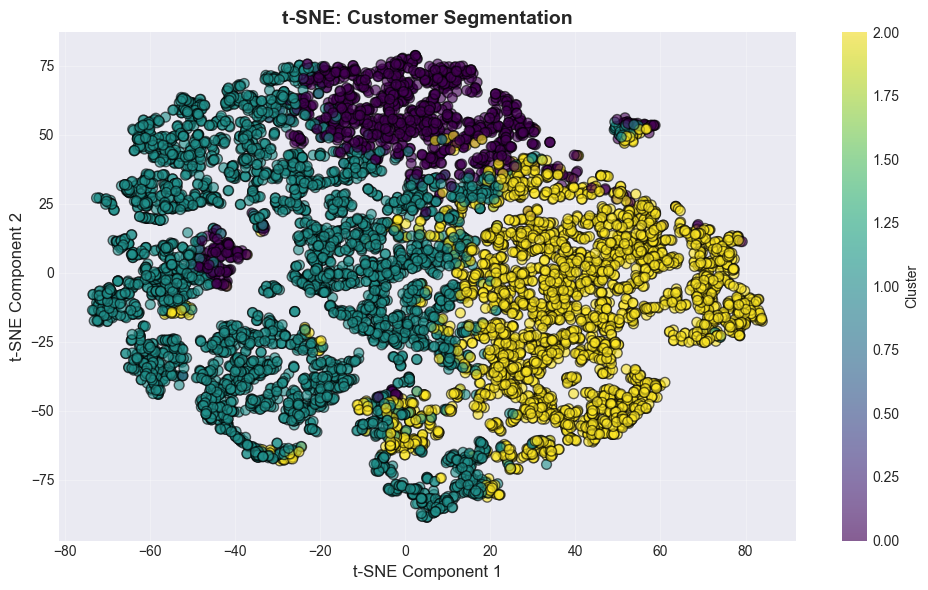

In [23]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels,
                     cmap='viridis', alpha=0.6, edgecolors='k', s=50)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.title('t-SNE: Customer Segmentation', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2.3 Side by side comparison

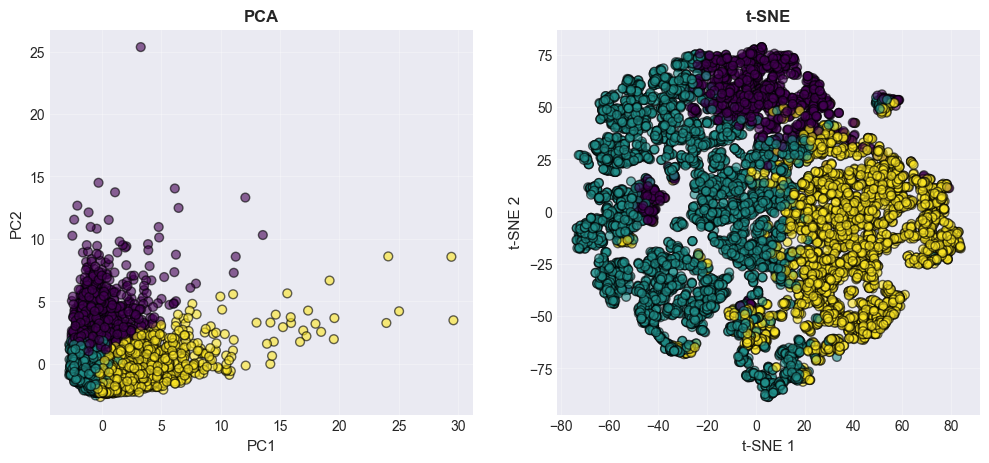

In [24]:
n_plots = 2
fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, 5))

if n_plots == 2:
    axes = [axes[0], axes[1]]

# PCA plot
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
                          cmap='viridis', alpha=0.6, edgecolors='k', s=40)
axes[0].set_xlabel('PC1', fontsize=11)
axes[0].set_ylabel('PC2', fontsize=11)
axes[0].set_title('PCA', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# t-SNE plot
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels,
                          cmap='viridis', alpha=0.6, edgecolors='k', s=40)
axes[1].set_xlabel('t-SNE 1', fontsize=11)
axes[1].set_ylabel('t-SNE 2', fontsize=11)
axes[1].set_title('t-SNE', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

### Dimensionality Reduction Discussion

The data appears to have non-linear structure: the linear PCA projection still shows substantial overlap between clusters, whereas the non-linear t-SNE embedding produces much clearer visual separation. This suggests the customer behaviors distinguishing the groups rely on relationships that PCA can’t fully capture in 2D. For business executives, I would present PCA as the primary view because it’s more interpretable (e.g., explained variance), and use t-SNE as supporting evidence to illustrate the stronger separation.